# Medical Insurance Prediction

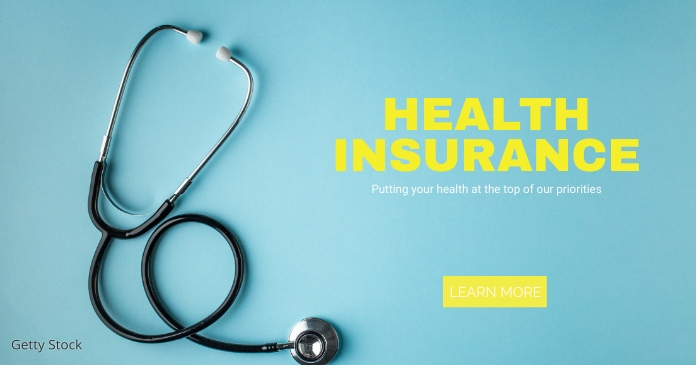

In [56]:
from IPython.display import Image
Image(filename=r"C:\Users\Admin\Downloads\Health Insurance Banner.jpg", width=1100, height=500)

### Problem Statement

Everyone’s life revolves around their health. Good health is essential to all aspects of our lives. Health refers to a person’s ability to cope up with the environment on a physical, emotional, mental, and social level. Because of the quick speed of our lives, we are adopting many habits that are harming our health. One spends a lot of money to be healthy by participating in physical activities or having frequent health check-ups to avoid being unfit and get rid of health disorders. When we become ill we tend to spend a lot of money, resulting in a lot of medical expenses.

So, an application can be made which can make people understand the factors which are making them unfit, and creating a lot of medical expenses, and it could identify and estimate medical expense if someone has such factors.

### Objective


· Predict the future medical expenses of subjects based on certain features building a robust machine learning model.

· Identifying the factors affecting the medical expenses of the subjects based on the model output.

#### Data Over View

Dataset Size: 25,000 rows, 15 columns

## Column Descriptions
* Occupation: Profession of the individual (e.g., Salaried, Business, Student).
* Cholesterol_level: Range of cholesterol levels (e.g., 125 to 150, 150 to 175).
* Age: Age of the individual in years.
* Heart_disease_history: Indicator of past heart disease (0 = No, 1 = Yes).
* Other_major_disease_history: Indicator of other major illnesses (0 = No, 1 = Yes).
* Gender: Gender of the individual (Male or Female).
* Body_mass_index (BMI): BMI value indicating body mass relative to height. (Range: 18.5 to 24.9)
* Smoking_status: Smoking behavior (e.g., Never smoked, Formerly smoked, Unknown).
* Location: City where the individual resides (e.g., Chennai, Jaipur, Bangalore).
* Weight: Weight of the individual in kilograms.
* Alcohol_consumption: Frequency of alcohol consumption (e.g., Rare, Daily, No).
* Exercise_regimen: Frequency or intensity of exercise (e.g., Moderate, Extreme, No).
* Weight_change_last_year: Change in weight (kg) over the past year.
* Body_fat_percentage: Percentage of body fat in the individual.
** Women: 25–30%
** Men: 18–23%
* Insurance_cost: The insurance cost associated with the individual. the individual.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

import warnings 
warnings.filterwarnings('ignore')

In [2]:
print("Loading and exploring the dataset...")
df = pd.read_csv(r'C:\Users\Admin\Desktop\Projects\Machine Learning\Dataset.csv')
df

Loading and exploring the dataset...


Occupation Cholesterol_level  Age  Heart_disease_history  \
0       Salaried        125 to 150   28                      1   
1        Student        150 to 175   50                      0   
2       Business        200 to 225   68                      0   
3       Business        175 to 200   51                      0   
4        Student        150 to 175   44                      0   
...          ...               ...  ...                    ...   
24995   Salaried        225 to 250   22                      0   
24996   Business        200 to 225   58                      0   
24997    Student        150 to 175   34                      0   
24998   Salaried        225 to 250   27                      0   
24999   Business        150 to 175   22                      1   

       Other_major_disease_history  Gender  Body_mass_index   Smoking_status  \
0                                0    Male             31.2          Unknown   
1                                0    Male             34.2  formerly smoked   
2                                0  Female             40.4  formerly smoked   
3                                0  Female             22.9          Unknown   
4                                1    Male             26.5     never smoked   
...                            ...     ...              ...              ...   
24995                            0    Male             36.1           smokes   
24996                            0    Male             31.3     never smoked   
24997                            1    Male              NaN          Unknown   
24998                            0    Male             26.6          Unknown   
24999                            0    Male             41.6  formerly smoked   

          Location  Weight Alcohol_consumption Exercise_regimen  \
0          Chennai      67                Rare         Moderate   
1           Jaipur      58                Rare         Moderate   
2           Jaipur      73               Daily          Extreme   
3          Chennai      71                Rare               No   
4        Bangalore      74                  No          Extreme   
...            ...     ...                 ...              ...   
24995       Kanpur      79                Rare         Moderate   
24996       Kanpur      66                Rare         Moderate   
24997  Bhubaneswar      76                Rare         Moderate   
24998        Surat      74                Rare         Moderate   
24999      Chennai      57                  No               No   

       Weight_change_last_year  Body_fat_percentage  Insurance_cost  
0                            1                   25           20978  
1                            3                   27            6170  
2                            0                   32           28382  
3                            3                   37           27148  
4                            0                   34           29616  
...                        ...                  ...             ...  
24995                        4                   40           39488  
24996                        2                   28           14808  
24997                        1                   35           33318  
24998                        0                   40           30850  
24999                        4                   21            6170  

[25000 rows x 15 columns]

In [3]:
# Display basic information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation                   25000 non-null  object 
 1   Cholesterol_level            25000 non-null  object 
 2   Age                          25000 non-null  int64  
 3   Heart_disease_history        25000 non-null  int64  
 4   Other_major_disease_history  25000 non-null  int64  
 5   Gender                       25000 non-null  object 
 6   Body_mass_index              24010 non-null  float64
 7   Smoking_status               25000 non-null  object 
 8   Location                     25000 non-null  object 
 9   Weight                       25000 non-null  int64  
 10  Alcohol_consumption          25000 non-null  object 
 11  Exercise_regimen             25000 non-null  object 
 12  Weight_change_last_year      25000 non-null  int64  


In [4]:
# Display the first few rows of the dataset
print("First 5 Rows of the Dataset:")
df.head()

First 5 Rows of the Dataset:


Occupation Cholesterol_level  Age  Heart_disease_history  \
0   Salaried        125 to 150   28                      1   
1    Student        150 to 175   50                      0   
2   Business        200 to 225   68                      0   
3   Business        175 to 200   51                      0   
4    Student        150 to 175   44                      0   

   Other_major_disease_history  Gender  Body_mass_index   Smoking_status  \
0                            0    Male             31.2          Unknown   
1                            0    Male             34.2  formerly smoked   
2                            0  Female             40.4  formerly smoked   
3                            0  Female             22.9          Unknown   
4                            1    Male             26.5     never smoked   

    Location  Weight Alcohol_consumption Exercise_regimen  \
0    Chennai      67                Rare         Moderate   
1     Jaipur      58                Rare         Moderate   
2     Jaipur      73               Daily          Extreme   
3    Chennai      71                Rare               No   
4  Bangalore      74                  No          Extreme   

   Weight_change_last_year  Body_fat_percentage  Insurance_cost  
0                        1                   25           20978  
1                        3                   27            6170  
2                        0                   32           28382  
3                        3                   37           27148  
4                        0                   34           29616

In [5]:
df.shape

(25000, 15)

In [6]:
#Basic Statistics 
df.describe()

Age  Heart_disease_history  Other_major_disease_history  \
count  25000.000000           25000.000000                 25000.000000   
mean      44.918320               0.054640                     0.098160   
std       16.107492               0.227281                     0.297537   
min       16.000000               0.000000                     0.000000   
25%       31.000000               0.000000                     0.000000   
50%       45.000000               0.000000                     0.000000   
75%       59.000000               0.000000                     0.000000   
max       74.000000               1.000000                     1.000000   

       Body_mass_index        Weight  Weight_change_last_year  \
count     24010.000000  25000.000000             25000.000000   
mean         31.393328     71.610480                 2.517960   
std           7.876535      9.325183                 1.690335   
min          12.300000     52.000000                 0.000000   
25%          26.100000     64.000000                 1.000000   
50%          30.500000     72.000000                 3.000000   
75%          35.600000     78.000000                 4.000000   
max         100.600000     96.000000                 6.000000   

       Body_fat_percentage  Insurance_cost  
count         25000.000000    25000.000000  
mean             28.812280    27147.407680  
std               8.632382    14323.691832  
min              11.000000     2468.000000  
25%              21.000000    16042.000000  
50%              31.000000    27148.000000  
75%              36.000000    37020.000000  
max              42.000000    67870.000000

In [7]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Occupation                       0
Cholesterol_level                0
Age                              0
Heart_disease_history            0
Other_major_disease_history      0
Gender                           0
Body_mass_index                990
Smoking_status                   0
Location                         0
Weight                           0
Alcohol_consumption              0
Exercise_regimen                 0
Weight_change_last_year          0
Body_fat_percentage              0
Insurance_cost                   0
dtype: int64

In [8]:
# Fill missing values with median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)

In [9]:
df.isnull().sum()

Occupation                     0
Cholesterol_level              0
Age                            0
Heart_disease_history          0
Other_major_disease_history    0
Gender                         0
Body_mass_index                0
Smoking_status                 0
Location                       0
Weight                         0
Alcohol_consumption            0
Exercise_regimen               0
Weight_change_last_year        0
Body_fat_percentage            0
Insurance_cost                 0
dtype: int64

In [51]:
#Rounding the Insurance cost column to 3 decimal places
df['Insurance_cost'] = df['Insurance_cost'].round(3)
df

Occupation  Cholesterol_level  Age  Heart_disease_history  \
0               1                  0   28                      1   
1               2                  1   50                      0   
2               0                  3   68                      0   
3               0                  2   51                      0   
4               2                  1   44                      0   
...           ...                ...  ...                    ...   
24995           1                  4   22                      0   
24996           0                  3   58                      0   
24997           2                  1   34                      0   
24998           1                  4   27                      0   
24999           0                  1   22                      1   

       Other_major_disease_history  Gender  Body_mass_index  Smoking_status  \
0                                0       1             31.2               0   
1                                0       1             34.2               1   
2                                0       0             40.4               1   
3                                0       0             22.9               0   
4                                1       1             26.5               2   
...                            ...     ...              ...             ...   
24995                            0       1             36.1               3   
24996                            0       1             31.3               2   
24997                            1       1             30.5               0   
24998                            0       1             26.6               0   
24999                            0       1             41.6               1   

       Location  Weight  Alcohol_consumption  Exercise_regimen  \
0             3      67                    2                 1   
1             6      58                    2                 1   
2             6      73                    0                 0   
3             3      71                    2                 2   
4             1      74                    1                 0   
...         ...     ...                  ...               ...   
24995         7      79                    2                 1   
24996         7      66                    2                 1   
24997         2      76                    2                 1   
24998        14      74                    2                 1   
24999         3      57                    1                 2   

       Weight_change_last_year  Body_fat_percentage  Insurance_cost  
0                            1                   25           20978  
1                            3                   27            6170  
2                            0                   32           28382  
3                            3                   37           27148  
4                            0                   34           29616  
...                        ...                  ...             ...  
24995                        4                   40           39488  
24996                        2                   28           14808  
24997                        1                   35           33318  
24998                        0                   40           30850  
24999                        4                   21            6170  

[25000 rows x 15 columns]

In [10]:
# Check for duplicate values
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


#### Exploratory Data Analysis (EDA)

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns

In [13]:
## Univariate Analysis

In [14]:
print("\nUnique values in categorical columns:")
for col in cat_cols:
    print(f"\n{col}:", df[col].nunique(), "unique values")
    print(df[col].value_counts().head())


Unique values in categorical columns:

Occupation: 3 unique values
Occupation
Student     10169
Business    10020
Salaried     4811
Name: count, dtype: int64

Cholesterol_level: 5 unique values
Cholesterol_level
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: count, dtype: int64

Gender: 2 unique values
Gender
Male      16422
Female     8578
Name: count, dtype: int64

Smoking_status: 4 unique values
Smoking_status
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: count, dtype: int64

Location: 15 unique values
Location
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Name: count, dtype: int64

Alcohol_consumption: 3 unique values
Alcohol_consumption
Rare     13752
No        8541
Daily     2707
Name: count, dtype: int64

Exercise_regimen: 3 unique values
Exercise_regimen
Moderate    14638
Extreme      5248
No           5114
Name: co

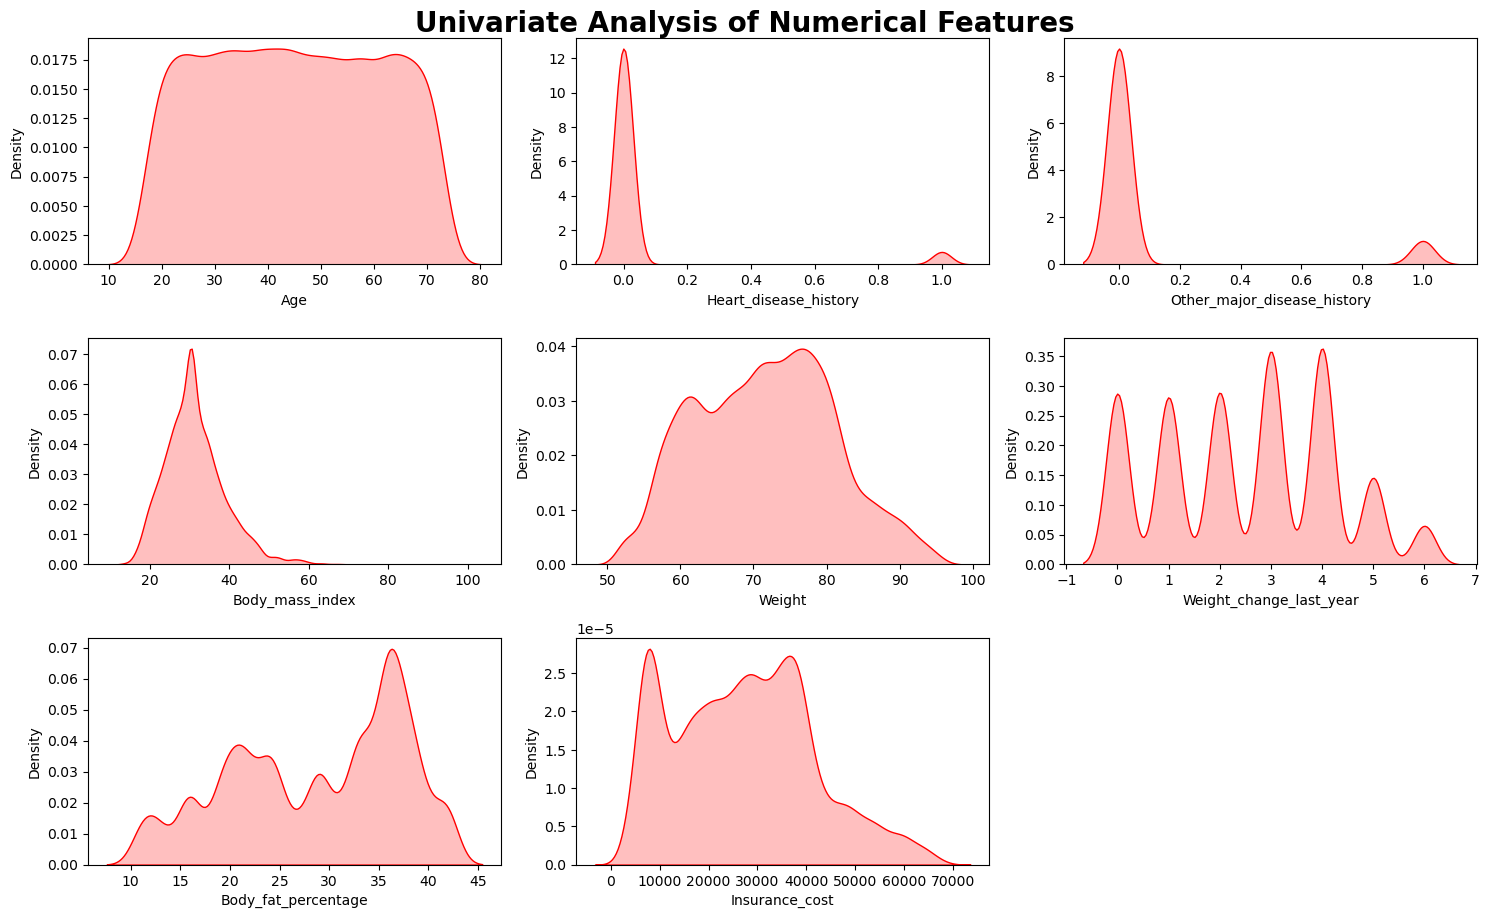

In [15]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold')

for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]],shade=True, color='r')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

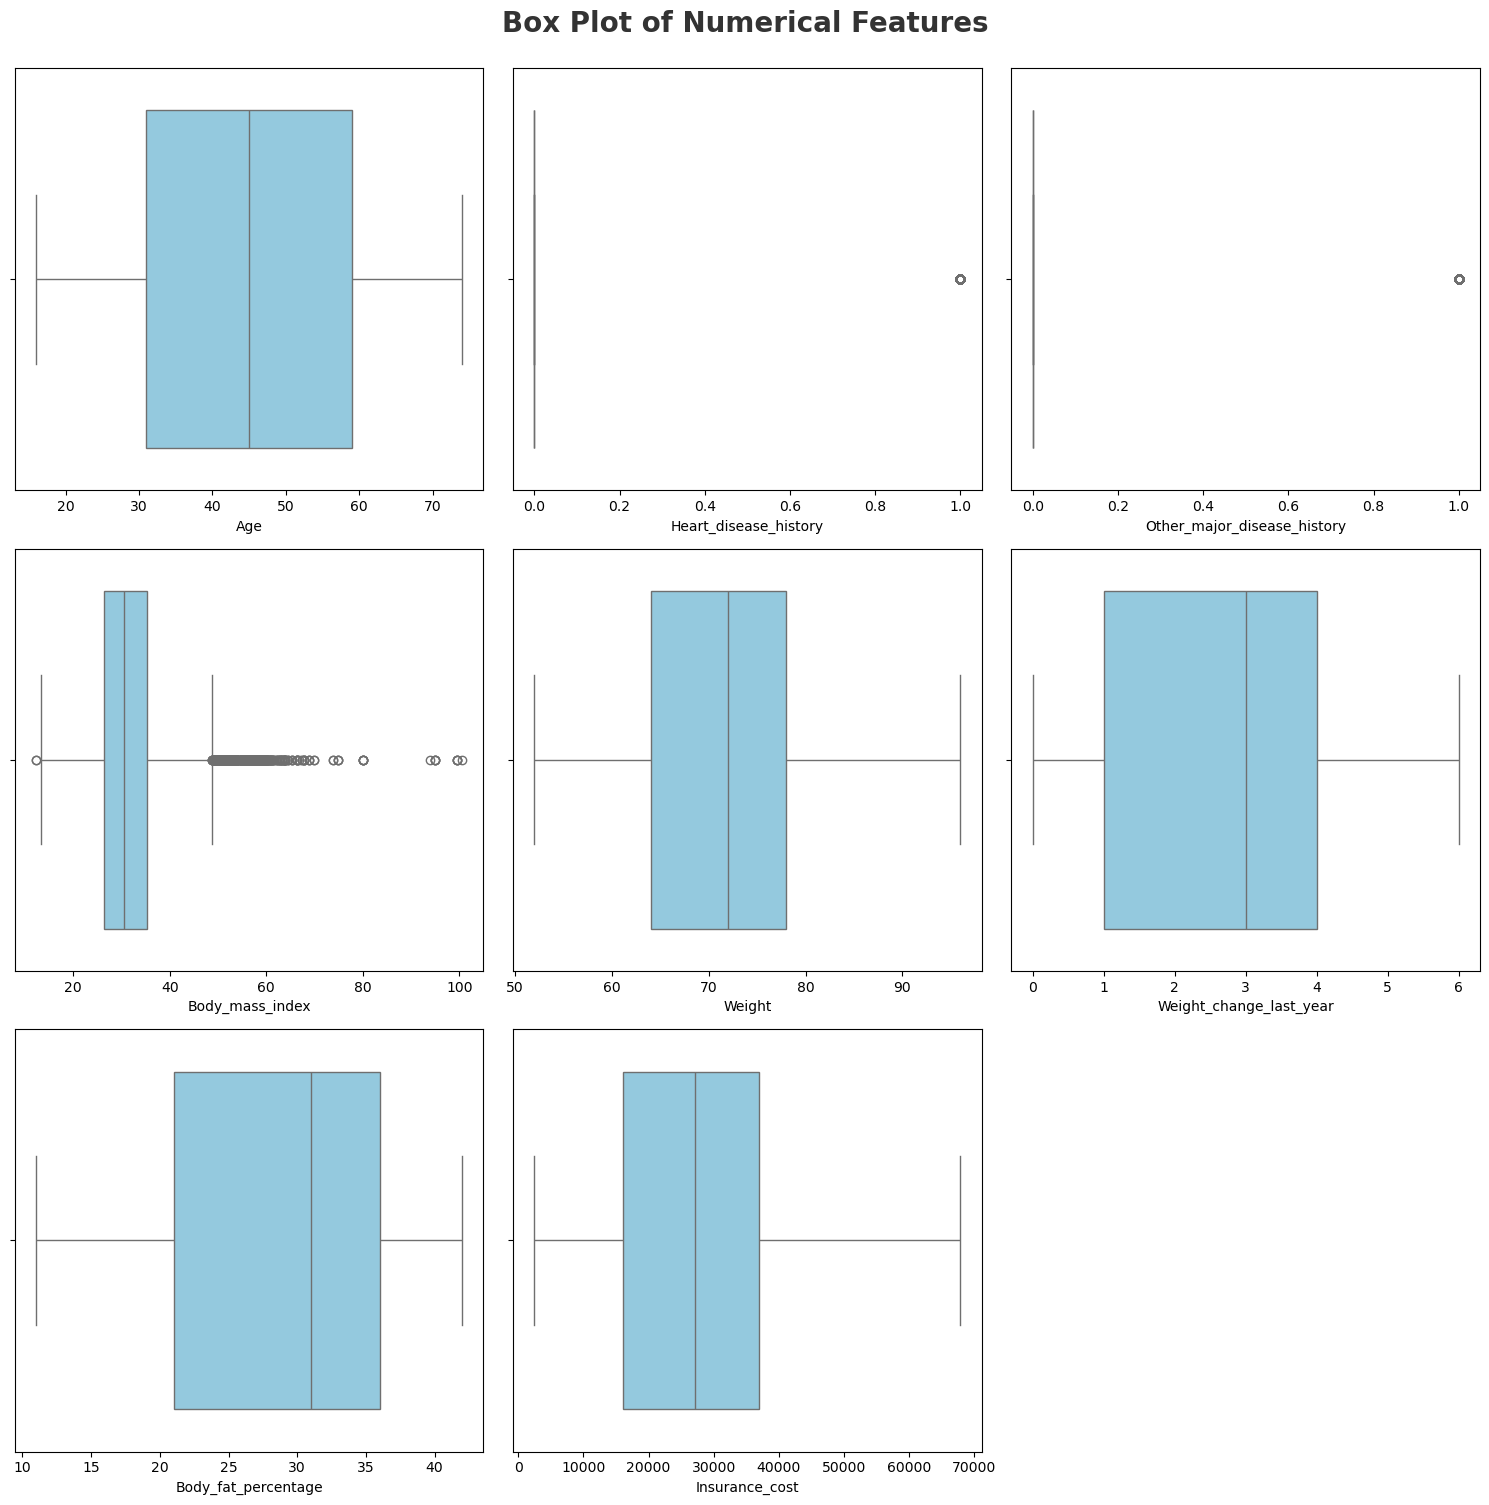

In [55]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(len(num_cols)):  
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[num_cols[i]], color="skyblue")  # Change color here
    plt.xlabel(num_cols[i])
    plt.tight_layout()

plt.show()

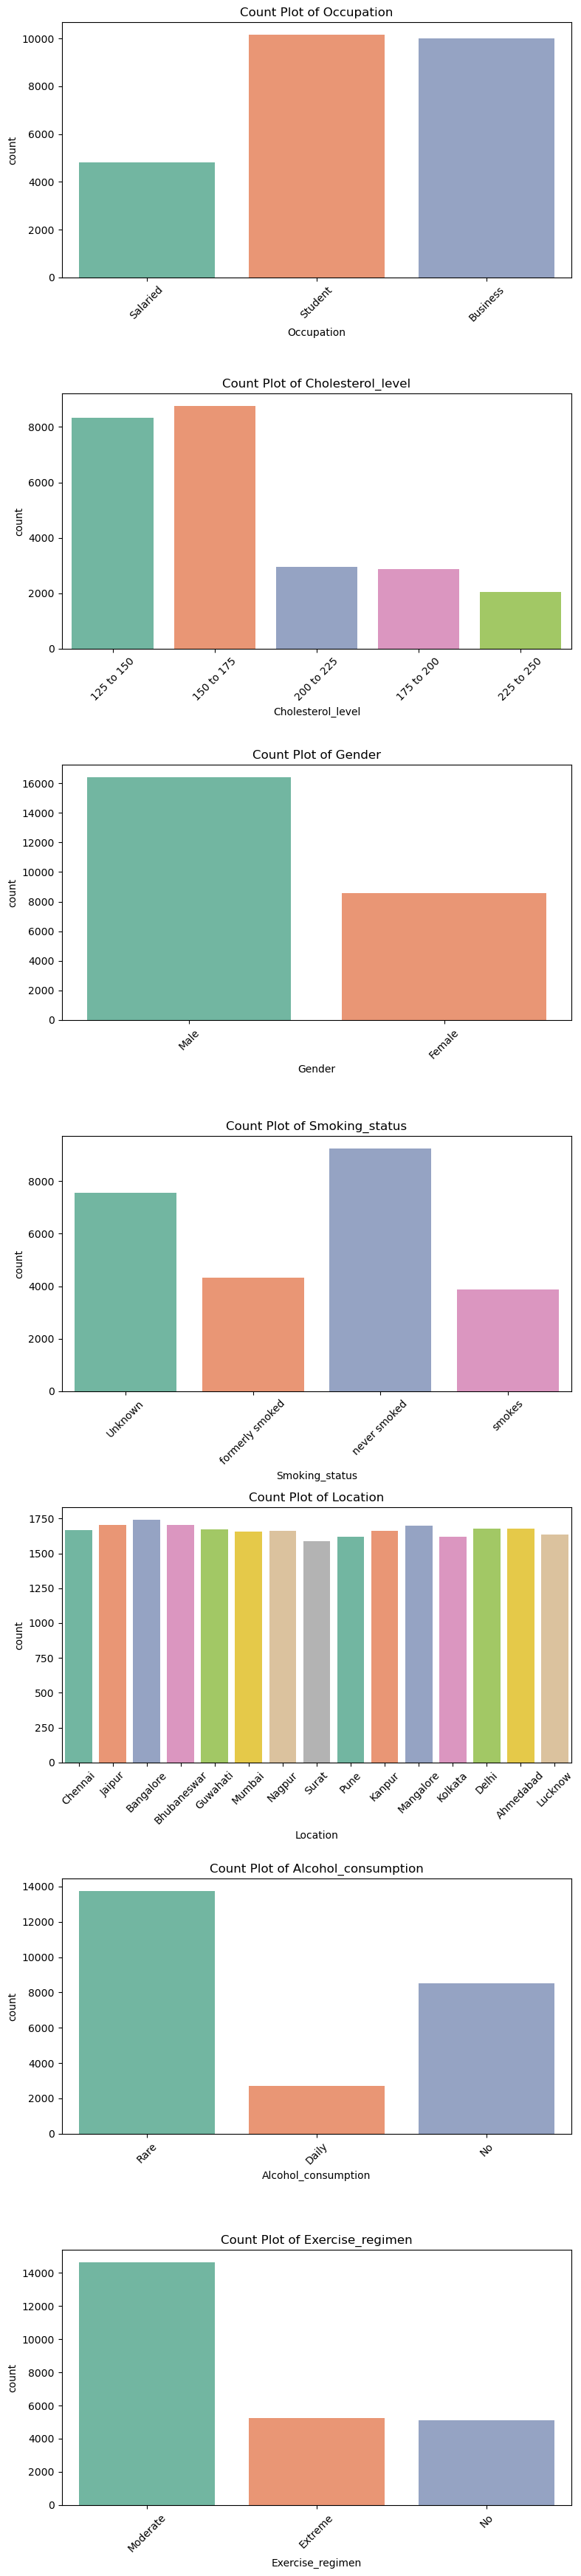

In [17]:
# 2Count Plots for Categorical Features
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(8, 5 * len(cat_cols)))
for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], palette="Set2", ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

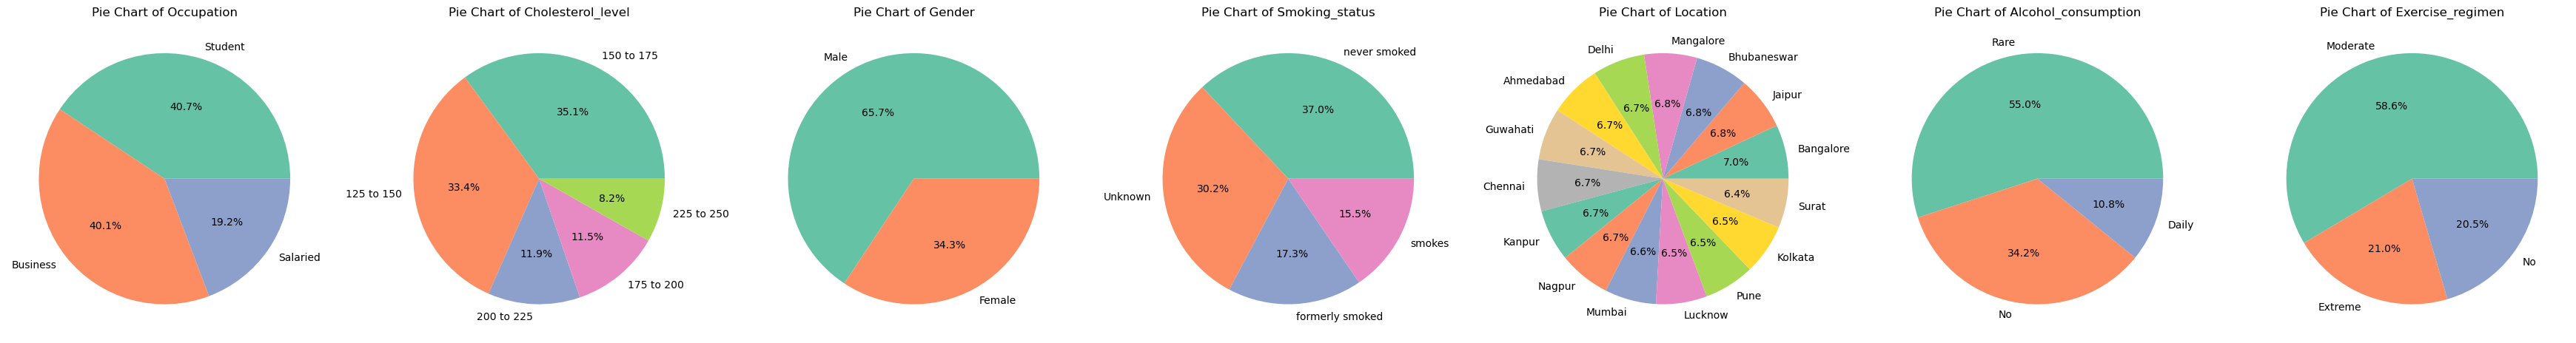

In [18]:
# Pie Charts for Categorical Features
fig, axes = plt.subplots(1, len(cat_cols), figsize=(5 * len(cat_cols), 10))
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"), ax=axes[i])
    axes[i].set_title(f'Pie Chart of {col}')
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

In [19]:
# Check skewness
skewness = df[num_cols].skew()
print("Skewness before transformation:\n", skewness)

Skewness before transformation:
 Age                            0.013860
Heart_disease_history          3.919343
Other_major_disease_history    2.701327
Body_mass_index                1.090847
Weight                         0.109077
Weight_change_last_year        0.068026
Body_fat_percentage           -0.363262
Insurance_cost                 0.331650
dtype: float64


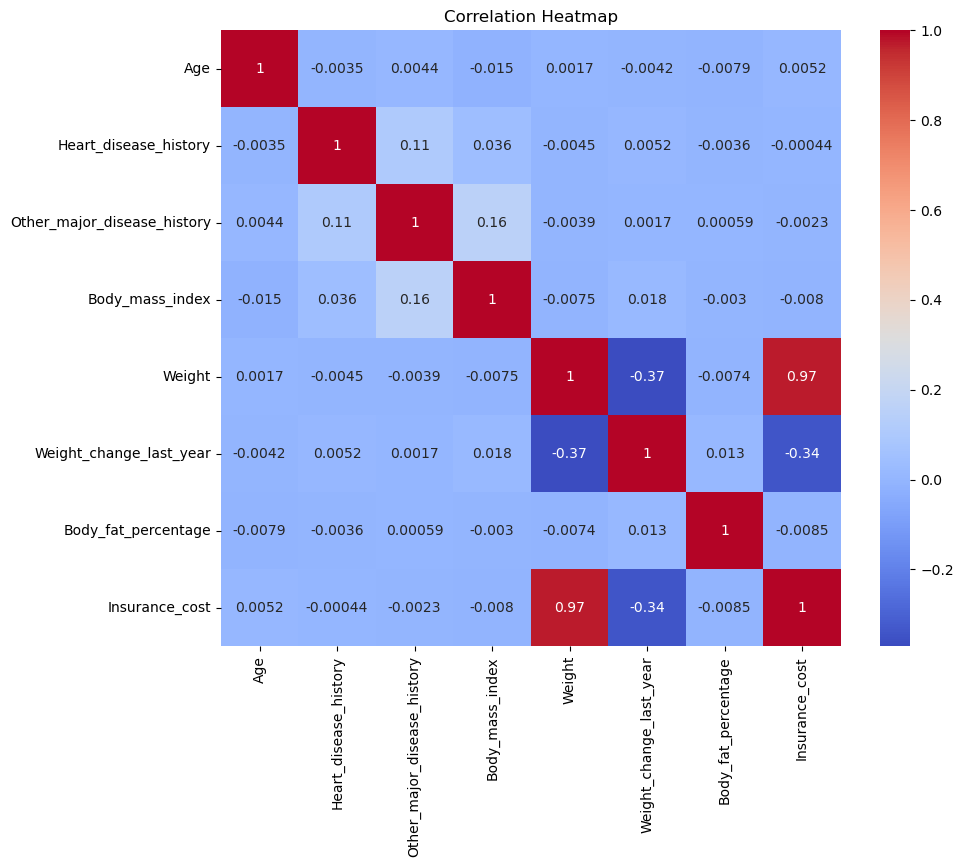

In [20]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Bivariate Analysis

<Figure size 1200x600 with 0 Axes>

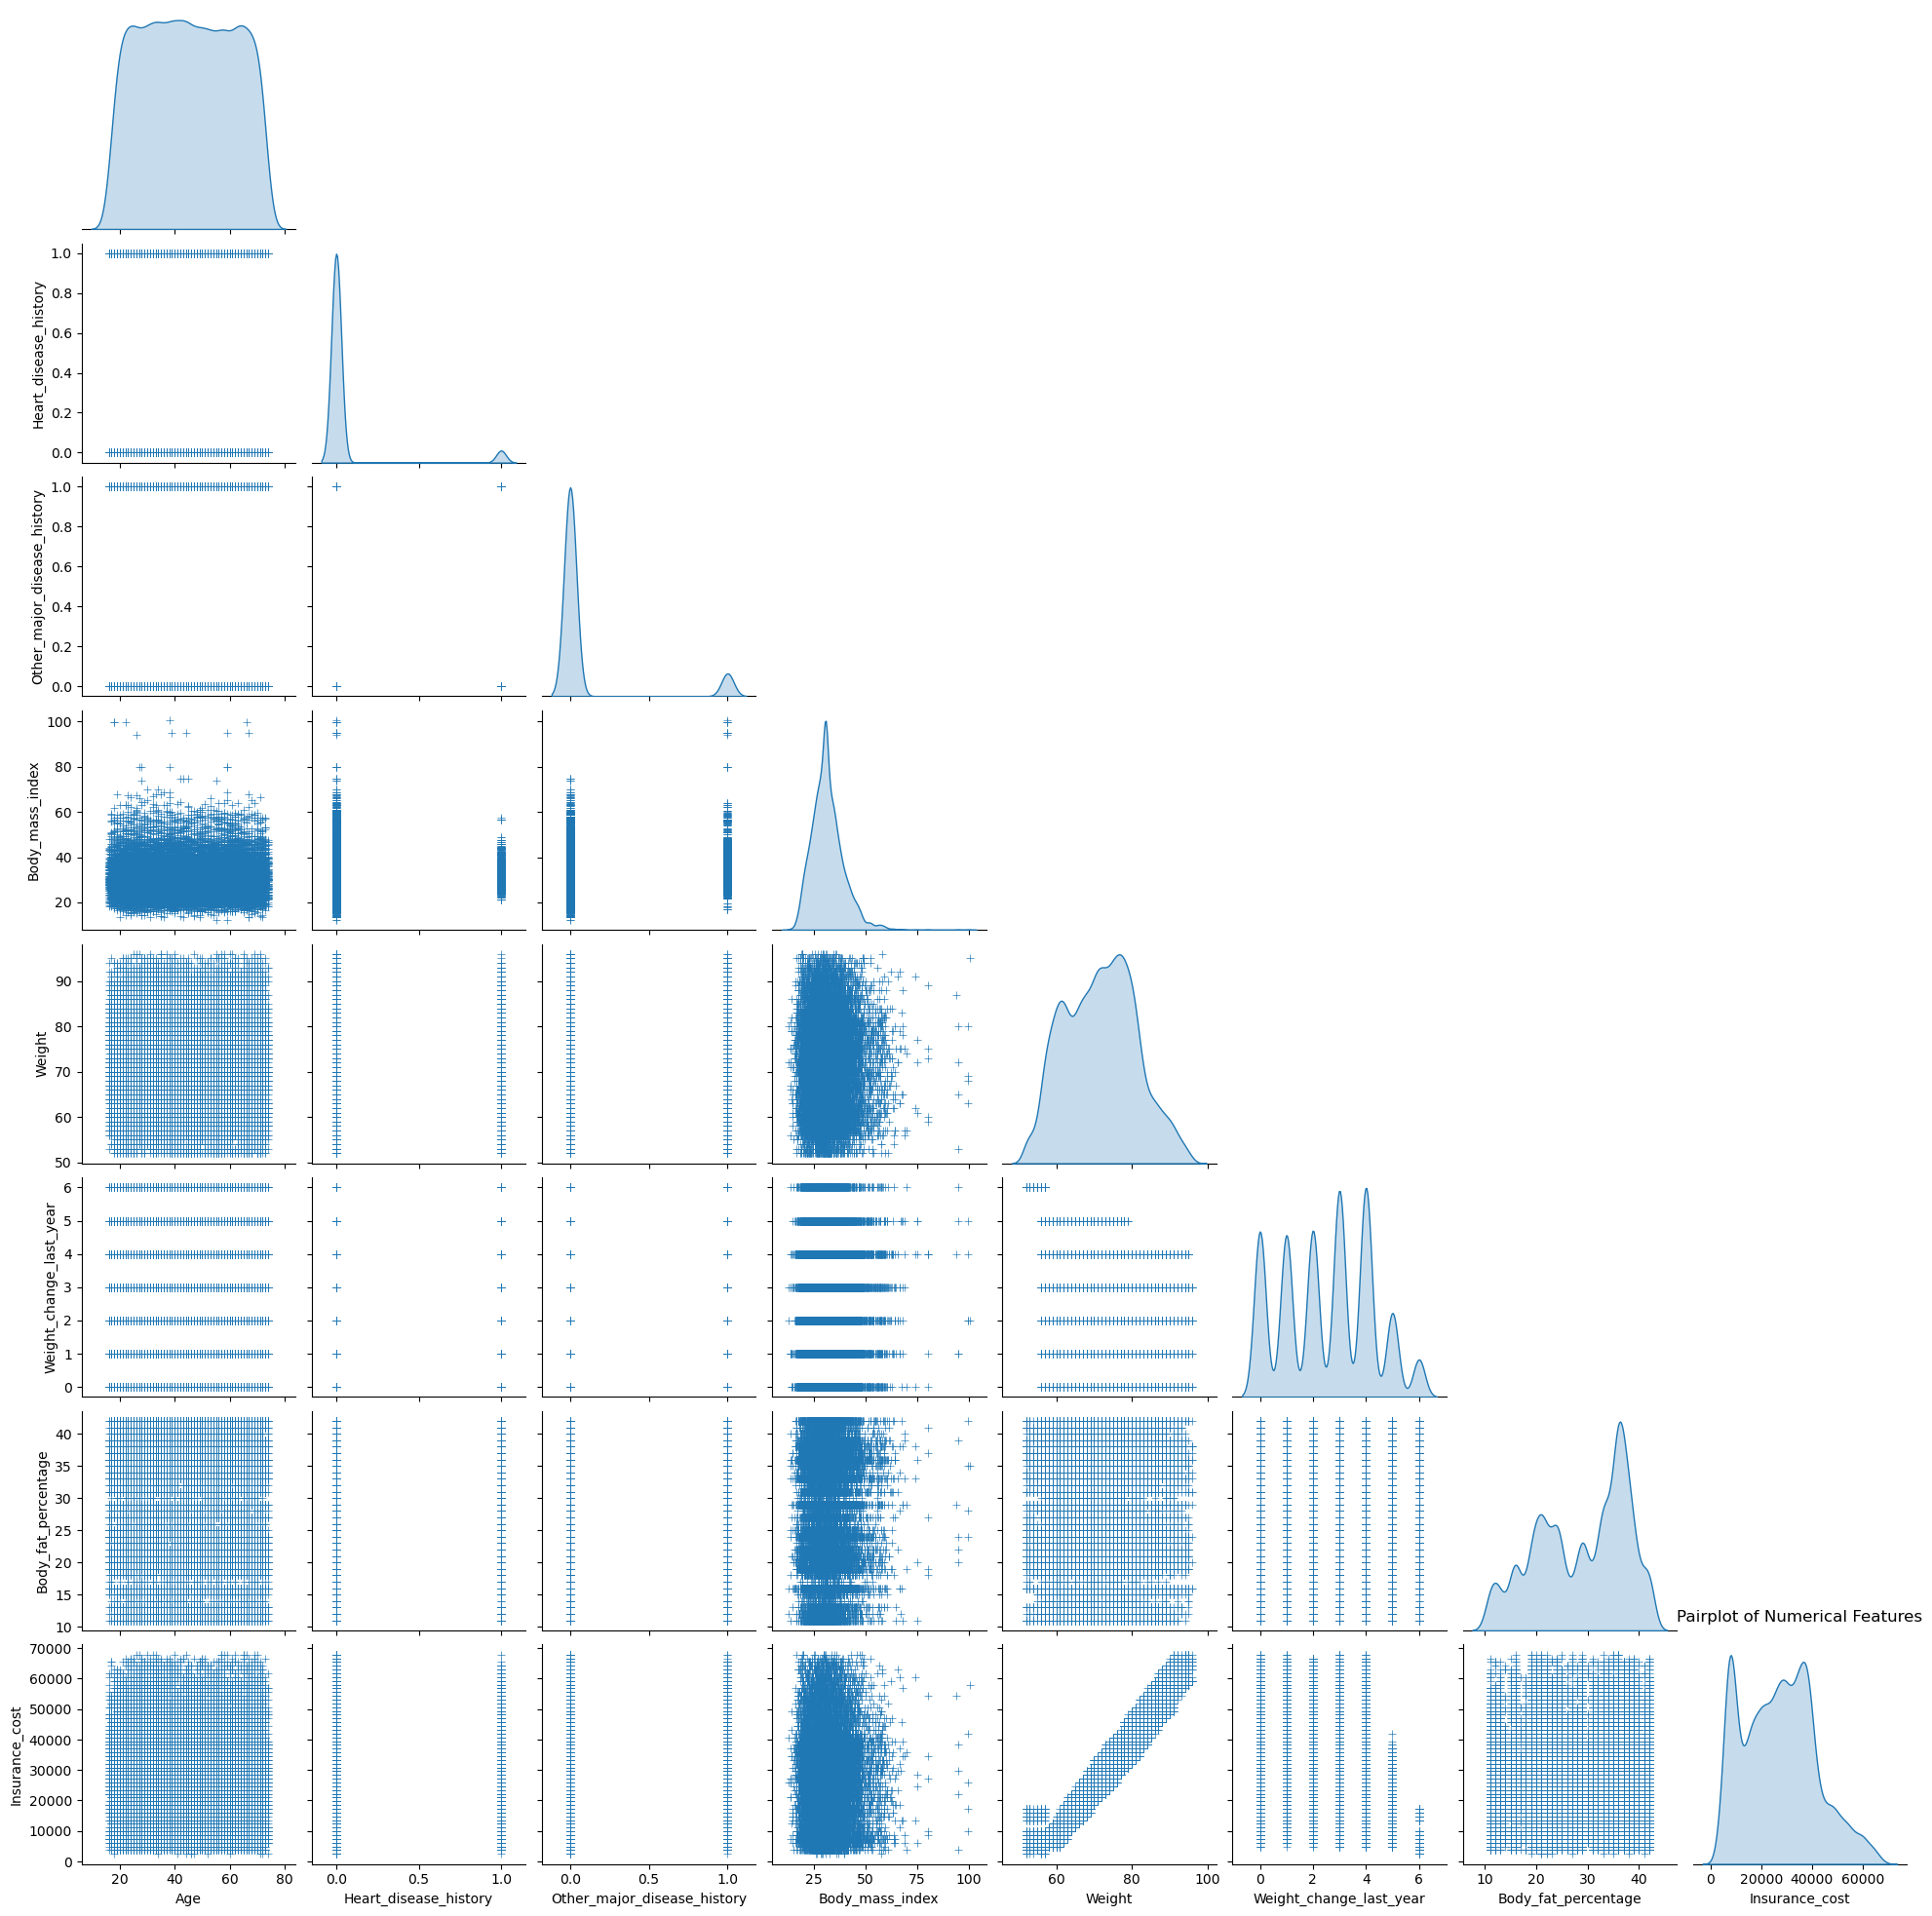

In [21]:
#  Scatter Plot for Numerical Columns vs Insurance Cost
plt.figure(figsize=(12, 6))
sns.pairplot(df[num_cols], diag_kind="kde", markers='+', corner=True)
plt.title("Pairplot of Numerical Features")
plt.show()

The diagonal plots show the distribution of individual variables.
insurance_cost has a right-skewed distribution.
Strong positive correlation expected, as BMI is dependent on weight and height.
indicating higher BMI corresponds to higher body fat.
higher body fat percentage might be associated with higher insurance costs.

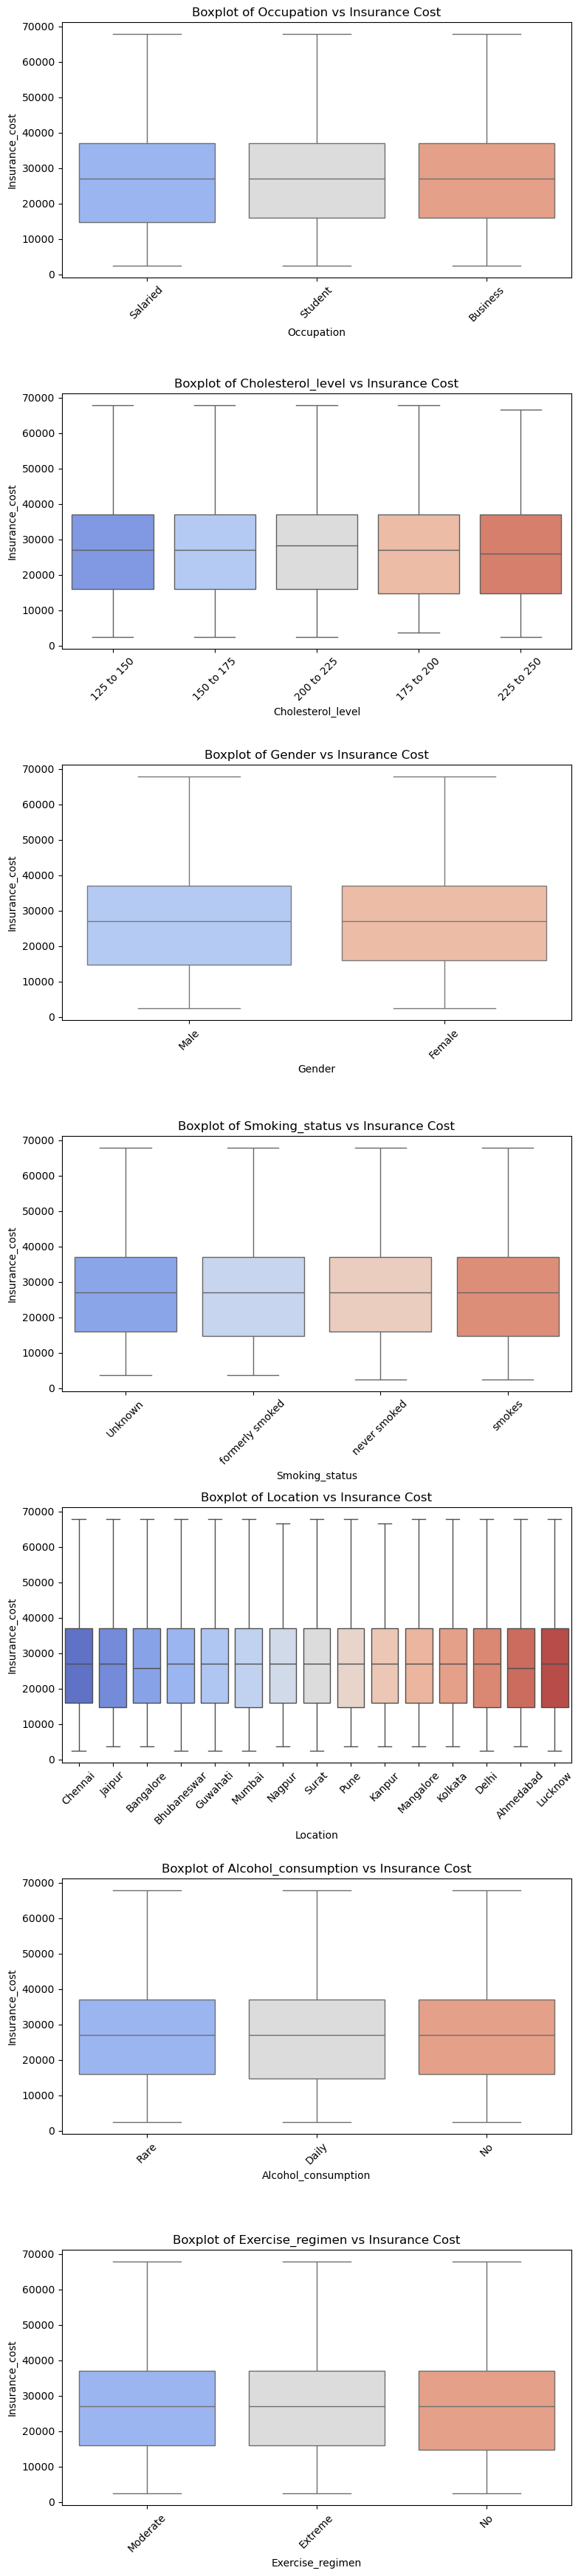

In [22]:
#  Boxplot of Categorical Features vs Insurance Cost
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(8, 5 * len(cat_cols)))
for i, col in enumerate(cat_cols):
    sns.boxplot(x=df[col], y=df['Insurance_cost'], palette="coolwarm", ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} vs Insurance Cost')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

#### Multivariate Analysis

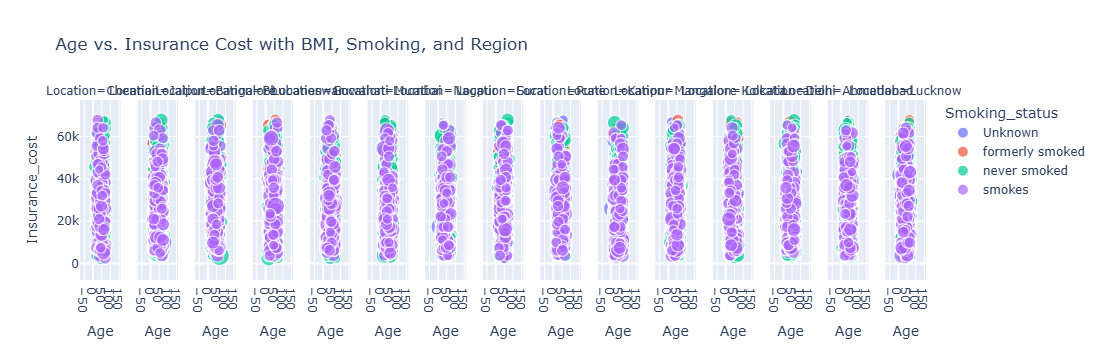

In [23]:
# Multivariate scatter plot: Age, BMI, Expenses by Smoking and Region
import plotly.express as px

fig = px.scatter(
    df,
    x='Age',
    y='Insurance_cost',
    size='Body_mass_index',
    color='Smoking_status',
    facet_col='Location',
    title='Age vs. Insurance Cost with BMI, Smoking, and Region'
)
fig.show()

#### Outlier Removal using IQR

In [24]:
print("\nDataset after removing outliers:")
print(df.shape)


Dataset after removing outliers:
(25000, 15)


### Multicollinearity Check

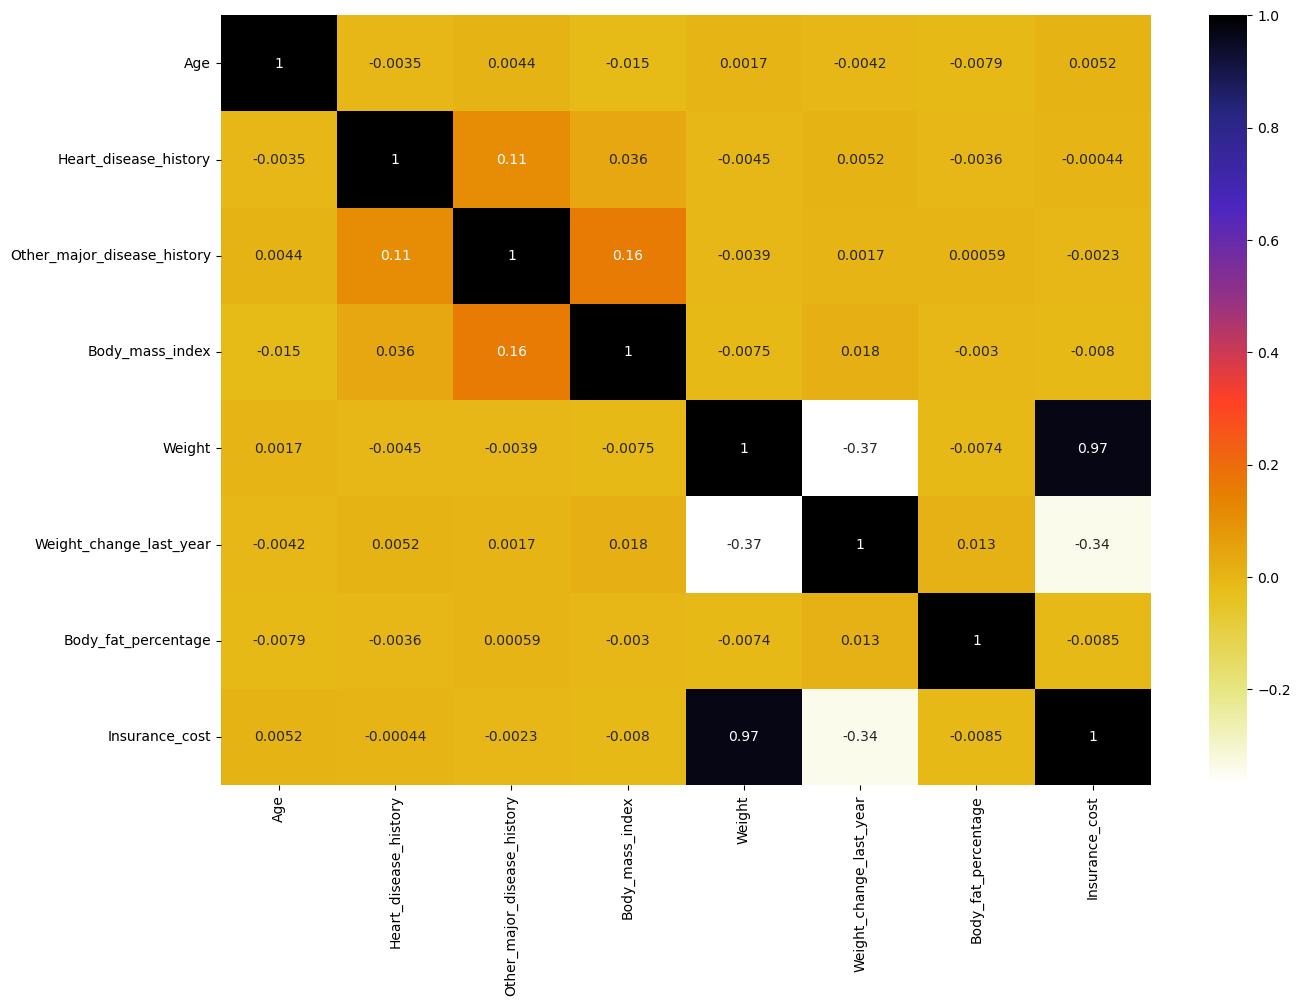

In [25]:
plt.figure(figsize = (15,10))
sns.heatmap(df[num_cols].corr(), cmap="CMRmap_r", annot=True)
plt.show()

In [26]:
from scipy.stats import skew

Age : 0.013859196440747387
Heart_disease_history : 3.9191081420686427
Other_major_disease_history : 2.7011651566726247
Body_mass_index : 1.0907814290417708
Weight : 0.1090701964100026
Weight_change_last_year : 0.06802159808928099
Body_fat_percentage : -0.3632397351728316
Insurance_cost : 0.33163016317618926


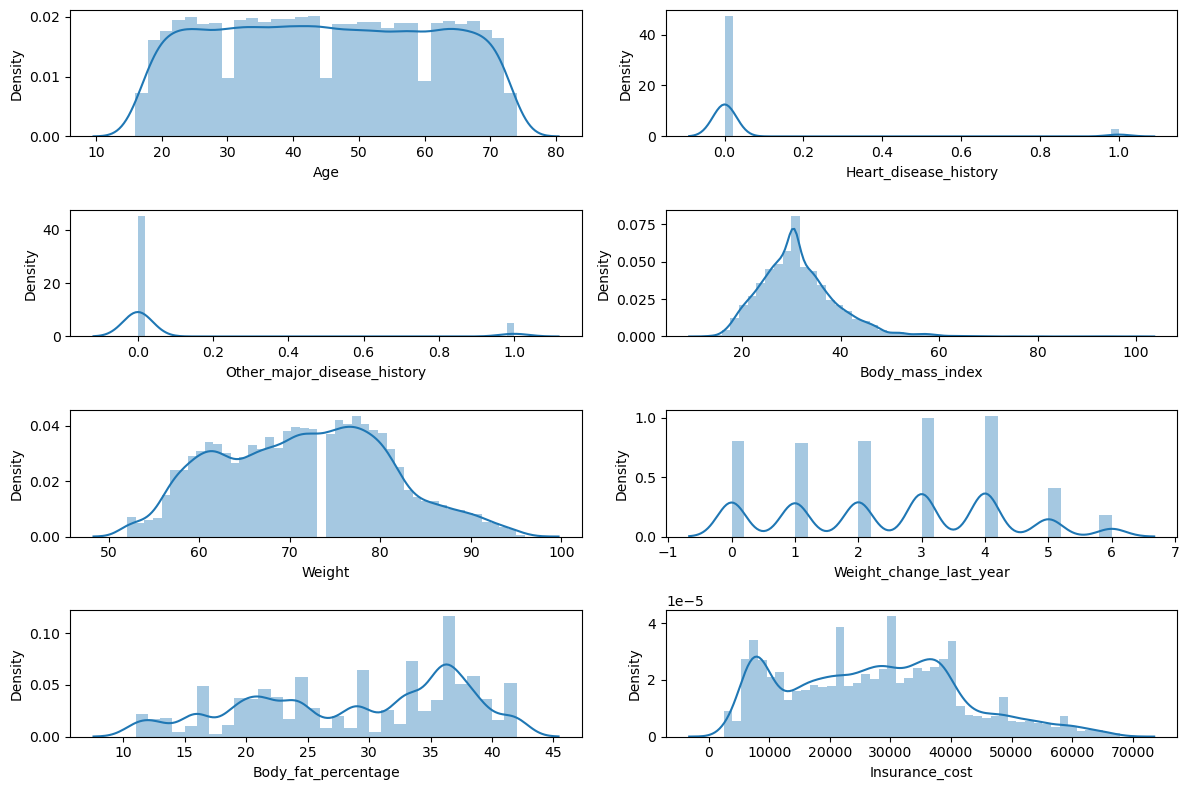

In [27]:
plt.figure(figsize=(12, 8))

# Loop through numerical columns
for i, col in enumerate(num_cols):
    print(col, ': ', end='')
    print(skew(df[col]))  # Print skewness of the column
    plt.subplot(4, 2, i+1)  
    sns.distplot(df[col],hist=True) 
    plt.xlabel(col)

plt.tight_layout()  # Adjust layout to fit plots
plt.show()

Before applying the transformation we should check the following conditions:

If the col has skewness is showing the good coorrelation with target, then do not remove the skewness.

If the col has skewness has some neagtive values, do not remove the skewness.

In [28]:
df.head()

Occupation Cholesterol_level  Age  Heart_disease_history  \
0   Salaried        125 to 150   28                      1   
1    Student        150 to 175   50                      0   
2   Business        200 to 225   68                      0   
3   Business        175 to 200   51                      0   
4    Student        150 to 175   44                      0   

   Other_major_disease_history  Gender  Body_mass_index   Smoking_status  \
0                            0    Male             31.2          Unknown   
1                            0    Male             34.2  formerly smoked   
2                            0  Female             40.4  formerly smoked   
3                            0  Female             22.9          Unknown   
4                            1    Male             26.5     never smoked   

    Location  Weight Alcohol_consumption Exercise_regimen  \
0    Chennai      67                Rare         Moderate   
1     Jaipur      58                Rare         Moderate   
2     Jaipur      73               Daily          Extreme   
3    Chennai      71                Rare               No   
4  Bangalore      74                  No          Extreme   

   Weight_change_last_year  Body_fat_percentage  Insurance_cost  
0                        1                   25           20978  
1                        3                   27            6170  
2                        0                   32           28382  
3                        3                   37           27148  
4                        0                   34           29616

### Encoding and Scaling

In [29]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols

# Initialize LabelEncoder
label_encoders = {}

# Label Encoding to categorical features
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform categorical data
    label_encoders[col] = le  # Store encoder for future use

print("Label Encoding applied to:", cat_cols)

Label Encoding applied to: Index(['Occupation', 'Cholesterol_level', 'Gender', 'Smoking_status',
       'Location', 'Alcohol_consumption', 'Exercise_regimen'],
      dtype='object')


In [30]:
from sklearn.model_selection import train_test_split
x = df.drop(['Insurance_cost'], axis=1)
y = df['Insurance_cost']

In [31]:
# Standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
# Instantiate the model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

# Model performance for Training set
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Calculate metrics
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# Print results
print("Linear Regression Results:")
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {rmse_train_lr}")
print(f"- Mean Absolute Error: {mae_train_lr}")
print(f"- R2 Score: {r2_train_lr}")
print("----------------------------------")
print("Model performance for Test set")
print(f"- Root Mean Squared Error: {rmse_test_lr}")
print(f"- Mean Absolute Error: {mae_test_lr}")
print(f"- R2 Score: {r2_test_lr}")
print("="*35)

Linear Regression Results:
Model performance for Training set
- Root Mean Squared Error: 3452.94480148288
- Mean Absolute Error: 2781.5762702044226
- R2 Score: 0.9419858587626475
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3439.5220178671357
- Mean Absolute Error: 2770.8528649295595
- R2 Score: 0.9419327916067382


In [35]:
# Instantiate the model
ridge_model = Ridge()

# Hyperparameter tuning using GridSearchCV
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)

# Best model
best_ridge_model = grid_search_ridge.best_estimator_

# Model performance for Training set
y_train_pred_ridge = best_ridge_model.predict(X_train)
y_test_pred_ridge = best_ridge_model.predict(X_test)

# Calculate metrics
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Print results
print("Ridge Regression Results:")
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {rmse_train_ridge}")
print(f"- Mean Absolute Error: {mae_train_ridge}")
print(f"- R2 Score: {r2_train_ridge}")
print("----------------------------------")
print("Model performance for Test set")
print(f"- Root Mean Squared Error: {rmse_test_ridge}")
print(f"- Mean Absolute Error: {mae_test_ridge}")
print(f"- R2 Score: {r2_test_ridge}")
print(f"Best Hyperparameters: {grid_search_ridge.best_params_}")
print("="*35)

Ridge Regression Results:
Model performance for Training set
- Root Mean Squared Error: 3452.949798366319
- Mean Absolute Error: 2781.59387405381
- R2 Score: 0.9419856908537303
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3439.433754296512
- Mean Absolute Error: 2770.6657169772393
- R2 Score: 0.9419357717611676
Best Hyperparameters: {'alpha': 100}


In [36]:
# Instantiate the model
lasso_model = Lasso()

# Hyperparameter tuning using GridSearchCV
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso, cv=5)
grid_search_lasso.fit(X_train, y_train)

# Best model
best_lasso_model = grid_search_lasso.best_estimator_

# Model performance for Training set
y_train_pred_lasso = best_lasso_model.predict(X_train)
y_test_pred_lasso = best_lasso_model.predict(X_test)

# Calculate metrics
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print results
print("Lasso Regression Results:")
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {rmse_train_lasso}")
print(f"- Mean Absolute Error: {mae_train_lasso}")
print(f"- R2 Score: {r2_train_lasso}")
print("----------------------------------")
print("Model performance for Test set")
print(f"- Root Mean Squared Error: {rmse_test_lasso}")
print(f"- Mean Absolute Error: {mae_test_lasso}")
print(f"- R2 Score: {r2_test_lasso}")
print(f"Best Hyperparameters: {grid_search_lasso.best_params_}")
print("="*35)

Lasso Regression Results:
Model performance for Training set
- Root Mean Squared Error: 3453.368465386777
- Mean Absolute Error: 2782.228382347329
- R2 Score: 0.941971621636474
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3439.193650959729
- Mean Absolute Error: 2769.902011982888
- R2 Score: 0.9419438782864423
Best Hyperparameters: {'alpha': 10}


In [37]:
# Decision Tree Regressor:
# Instantiate the model
dt_model = DecisionTreeRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_dt = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Best model
best_dt_model = grid_search_dt.best_estimator_

# Model performance for Training set
y_train_pred_dt = best_dt_model.predict(X_train)
y_test_pred_dt = best_dt_model.predict(X_test)

# Calculate metrics
mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
mae_train_dt = mean_absolute_error(y_train, y_train_pred_dt)
rmse_train_dt = np.sqrt(mse_train_dt)
r2_train_dt = r2_score(y_train, y_train_pred_dt)

mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)
rmse_test_dt = np.sqrt(mse_test_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)

# Print results
print("Decision Tree Regressor Results:")
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {rmse_train_dt}")
print(f"- Mean Absolute Error: {mae_train_dt}")
print(f"- R2 Score: {r2_train_dt}")
print("----------------------------------")
print("Model performance for Test set")
print(f"- Root Mean Squared Error: {rmse_test_dt}")
print(f"- Mean Absolute Error: {mae_test_dt}")
print(f"- R2 Score: {r2_test_dt}")
print(f"Best Hyperparameters: {grid_search_dt.best_params_}")
print("="*35)


Decision Tree Regressor Results:
Model performance for Training set
- Root Mean Squared Error: 3175.72511669193
- Mean Absolute Error: 2555.5825644966662
- R2 Score: 0.9509272491126075
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3143.056484588815
- Mean Absolute Error: 2526.0482395159024
- R2 Score: 0.9515114573198884
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2}


In [38]:
#Random Forest Regressor:
# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best model
best_rf_model = grid_search_rf.best_estimator_

# Model performance for Training set
y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate metrics
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Print results
print("Random Forest Regressor Results:")
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {rmse_train_rf}")
print(f"- Mean Absolute Error: {mae_train_rf}")
print(f"- R2 Score: {r2_train_rf}")
print("----------------------------------")
print("Model performance for Test set")
print(f"- Root Mean Squared Error: {rmse_test_rf}")
print(f"- Mean Absolute Error: {mae_test_rf}")
print(f"- R2 Score: {r2_test_rf}")
print(f"Best Hyperparameters: {grid_search_rf.best_params_}")
print("="*35)


Random Forest Regressor Results:
Model performance for Training set
- Root Mean Squared Error: 3160.3370924063747
- Mean Absolute Error: 2545.226103656508
- R2 Score: 0.9514016624521084
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3126.797074543062
- Mean Absolute Error: 2515.8843466393105
- R2 Score: 0.9520118338612434
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}


In [39]:
#Support Vector Regressor (SVR):


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the model
svr_model = SVR()

# Hyperparameter tuning using GridSearchCV
param_grid_svr = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5)
grid_search_svr.fit(X_train, y_train)

# Best model
best_svr_model = grid_search_svr.best_estimator_

# Model performance for Training set
y_train_pred_svr = best_svr_model.predict(X_train_scaled)
y_test_pred_svr = best_svr_model.predict(X_test_scaled)

# Calculate metrics
mse_train_svr = mean_squared_error(y_train, y_train_pred_svr)
mae_train_svr = mean_absolute_error(y_train, y_train_pred_svr)
rmse_train_svr = np.sqrt(mse_train_svr)
r2_train_svr = r2_score(y_train, y_train_pred_svr)

mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)
rmse_test_svr = np.sqrt(mse_test_svr)
r2_test_svr = r2_score(y_test, y_test_pred_svr)

# Print results
print("Support Vector Regressor Results:")
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {rmse_train_svr}")
print(f"- Mean Absolute Error: {mae_train_svr}")
print(f"- R2 Score: {r2_train_svr}")
print("----------------------------------")
print("Model performance for Test set")
print(f"- Root Mean Squared Error: {rmse_test_svr}")
print(f"- Mean Absolute Error: {mae_test_svr}")
print(f"- R2 Score: {r2_test_svr}")
print(f"Best Hyperparameters: {grid_search_svr.best_params_}")
print("="*35)

Support Vector Regressor Results:
Model performance for Training set
- Root Mean Squared Error: 107842.17199904585
- Mean Absolute Error: 107062.53846219635
- R2 Score: -55.588977751165984
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 107803.561459409
- Mean Absolute Error: 107029.77870878488
- R2 Score: -56.04281866174539
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [47]:
# Initialize the model list and R² score list
model_list = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree Regressor', 
              'Random Forest Regressor', 'Support Vector Regressor']
r2_list = [r2_test_lr, r2_test_lasso, r2_test_ridge, r2_test_dt,r2_test_rf,r2_test_svr]

# Create DataFrame
model_r2_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])

# Sort DataFrame by R² score in descending order
model_r2_df = model_r2_df.sort_values(by=["R2_Score"], ascending=False)

# Display the DataFrame
print(model_r2_df)

                 Model Name   R2_Score
4   Random Forest Regressor   0.952012
3   Decision Tree Regressor   0.951511
1          Lasso Regression   0.941944
2          Ridge Regression   0.941936
0         Linear Regression   0.941933
5  Support Vector Regressor -56.042819


In [41]:
# Initialize the model list and R² score list
model_list = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree Regressor', 
              'Random Forest Regressor', 'Support Vector Regressor']
r2_list = [r2_test_lr, r2_test_lasso, r2_test_ridge, r2_test_dt]

# Create DataFrame
model_r2_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])

# Sort DataFrame by R² score in descending order
model_r2_df = model_r2_df.sort_values(by=["R2_Score"], ascending=False)

# Display the DataFrame
print(model_r2_df)

                Model Name  R2_Score
3  Decision Tree Regressor  0.951511
1         Lasso Regression  0.941944
2         Ridge Regression  0.941936
0        Linear Regression  0.941933


In [42]:
df.head()

Occupation  Cholesterol_level  Age  Heart_disease_history  \
0           1                  0   28                      1   
1           2                  1   50                      0   
2           0                  3   68                      0   
3           0                  2   51                      0   
4           2                  1   44                      0   

   Other_major_disease_history  Gender  Body_mass_index  Smoking_status  \
0                            0       1             31.2               0   
1                            0       1             34.2               1   
2                            0       0             40.4               1   
3                            0       0             22.9               0   
4                            1       1             26.5               2   

   Location  Weight  Alcohol_consumption  Exercise_regimen  \
0         3      67                    2                 1   
1         6      58                    2                 1   
2         6      73                    0                 0   
3         3      71                    2                 2   
4         1      74                    1                 0   

   Weight_change_last_year  Body_fat_percentage  Insurance_cost  
0                        1                   25           20978  
1                        3                   27            6170  
2                        0                   32           28382  
3                        3                   37           27148  
4                        0                   34           29616

In [43]:
input_data = (1,0,38,0,1,0,25,2,5,60,2,1,2,30)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)   

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr_model.predict(input_data_reshaped)
print(prediction)

[9537.06946533]


In [44]:
input_data = (1,0,45,0,1,0,20,2,5,50,2,1,2,25)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)   

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr_model.predict(input_data_reshaped)
print(prediction)

[-5430.10455719]


In [62]:
df.head()

Occupation  Cholesterol_level  Age  Heart_disease_history  \
0           1                  0   28                      1   
1           2                  1   50                      0   
2           0                  3   68                      0   
3           0                  2   51                      0   
4           2                  1   44                      0   

   Other_major_disease_history  Gender  Body_mass_index  Smoking_status  \
0                            0       1             31.2               0   
1                            0       1             34.2               1   
2                            0       0             40.4               1   
3                            0       0             22.9               0   
4                            1       1             26.5               2   

   Location  Weight  Alcohol_consumption  Exercise_regimen  \
0         3      67                    2                 1   
1         6      58                    2                 1   
2         6      73                    0                 0   
3         3      71                    2                 2   
4         1      74                    1                 0   

   Weight_change_last_year  Body_fat_percentage  Insurance_cost  
0                        1                   25           20978  
1                        3                   27            6170  
2                        0                   32           28382  
3                        3                   37           27148  
4                        0                   34           29616

In [63]:
input_data = (1,0,50,0,1,0,30,2,5,60,2,1,2,20)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)   

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_rf_model.predict(input_data_reshaped)
rounded_prediction = np.round(prediction, 3)

print(rounded_prediction)

[8480.357]


### Conclusion 

This project demonstrates the process pf predicting medical health insurance cost using various regression models.The models performances are compared using evaluation metrics,and key insights are drawn from the analysis. The project highlights the importance of data preprocession,model selection and evaluation for accurate predictions in the fied of medical insurance cost estimation.